In [12]:
from docx import Document
import json
import pandas as pd

In [14]:
!pip install python-docx pandas

In [16]:
def parse_docx_to_dataframe(docx_path):
    doc = Document(docx_path)
    records = []
    
    for paragraph in doc.paragraphs:
        text = paragraph.text.strip() 
        if text:  
            try:
                record = json.loads(text)
                records.append(record)
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {text}")
    
    # Flatten JSON objects into a DataFrame
    df = pd.json_normalize(records)  # Automatically handles nested JSON structures
    return flatten_flight_data(df)
def flatten_flight_data(raw_df):
    # Initialize a list to store flattened data
    flattened_data = []
    
    for row in raw_df.iterrows():
        for item in row[1]:  # Loop through each cell in the row
            if isinstance(item, dict):  # Check if the item is already a dictionary
                flattened_data.append(item)
            else:
                try:
                    flattened_data.append(json.loads(item))  # Parse stringified JSON
                except json.JSONDecodeError:
                    print(f"Skipping invalid entry: {item}")
    
    # Normalize the list of dictionaries into a DataFrame
    return pd.json_normalize(flattened_data)

# Example usage

# Example usage
# docx_path = "./Train\\5.docx"
# flight_data = parse_docx_to_dataframe(docx_path)
# # flattened_df = flatten_flight_data(flight_data)

# # Save to a CSV for easier inspection
# # flight_data.to_csv("parsed_flight_data.csv", index=False)

# flight_data

In [18]:
import os

def process_all_docx_files(folder_path):
    all_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".docx"):
            print(f"Processing {filename}...")
            file_path = os.path.join(folder_path, filename)
            df = parse_docx_to_dataframe(file_path)
            all_data.append(df)
    
    # Combine all data into one DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

# Example usage
folder_path = "./Train"
all_flight_data = process_all_docx_files(folder_path)
# all_flight_data.to_csv("all_parsed_flight_data.csv", index=False)
all_flight_data

Processing 1.docx...
Processing 10.docx...
Processing 11.docx...
Processing 12.docx...
Processing 13.docx...
Processing 14.docx...
Processing 15.docx...
Processing 16.docx...
Processing 17.docx...
Processing 18.docx...
Processing 19.docx...
Processing 2.docx...
Processing 20.docx...
Processing 21.docx...
Processing 22.docx...
Processing 23.docx...
Processing 24.docx...
Processing 25.docx...
Processing 26.docx...
Processing 27.docx...
Processing 28.docx...
Processing 29.docx...
Processing 3.docx...
Processing 30.docx...
Processing 31.docx...
Processing 32.docx...
Processing 33.docx...
Processing 34.docx...
Processing 35.docx...
Processing 36.docx...
Processing 37.docx...
Processing 39.docx...
Processing 4.docx...
Processing 40.docx...
Processing 41.docx...
Processing 42.docx...
Processing 43.docx...
Processing 44.docx...
Processing 45.docx...
Processing 46.docx...
Processing 47.docx...
Processing 48.docx...
Processing 49.docx...
Processing 5.docx...
Processing 50.docx...
Processing 51.d

,type,status,departure.iataCode,departure.icaoCode,departure.terminal,departure.scheduledTime,departure.estimatedTime,departure.actualTime,departure.estimatedRunway,departure.actualRunway,...,codeshared.airline.iataCode,codeshared.airline.icaoCode,codeshared.flight.number,codeshared.flight.iataNumber,codeshared.flight.icaoNumber,arrival.gate,departure.gate,arrival.actualTime,arrival.estimatedRunway,arrival.actualRunway
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,NaN,2023-07-18t15:05:00.000,2023-07-18t15:05:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,NaN,2023-07-23t09:50:00.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,m,2023-07-26t23:30:00.000,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,m,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,NaN,2023-11-16t09:50:00.000,2023-11-16t09:50:00.000,2023-11-16t10:03:00.000,2023-11-16t10:03:00.000,2023-11-16t10:03:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51568,departure,active,lhe,opla,m,2023-11-16t11:40:00.000,2023-11-16t11:40:00.000,2023-11-16t11:48:00.000,2023-11-16t11:48:00.000,2023-11-16t11:48:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51569,departure,active,lhe,opla,m,2023-11-27t10:50:00.000,2023-11-27t14:35:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51570,departure,active,lhe,opla,m,2023-11-19t02:00:00.000,2023-11-19t11:00:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df = all_flight_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   type                          14910 non-null  object        
 1   status                        14910 non-null  object        
 2   departure.iataCode            14910 non-null  object        
 3   departure.icaoCode            14910 non-null  object        
 4   departure.scheduledTime       14910 non-null  datetime64[ns]
 5   departure.estimatedRunway     8695 non-null   object        
 6   departure.actualRunway        8695 non-null   object        
 7   arrival.iataCode              14910 non-null  object        
 8   arrival.icaoCode              14910 non-null  object        
 9   arrival.scheduledTime         14910 non-null  object        
 10  arrival.estimatedTime         8395 non-null   datetime64[ns]
 11  airline.name                

In [74]:
df.describe()
# print(df[['departure.scheduledTime', 'departure.actualTime', 'departure.estimatedTime']].info())
(df[['departure.scheduledTime', 'departure.estimatedRunway', 'departure.actualRunway', 'arrival.estimatedTime', 'arrival.scheduledTime' ]]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   departure.scheduledTime    14910 non-null  object
 1   departure.estimatedRunway  8695 non-null   object
 2   departure.actualRunway     8695 non-null   object
 3   arrival.estimatedTime      8395 non-null   object
 4   arrival.scheduledTime      14910 non-null  object
dtypes: object(5)
memory usage: 582.6+ KB


In [18]:
# train

import pandas as pd
from datetime import datetime
# Normalize the timestamps and calculate delay
df_transformed = pd.DataFrame({
    "Flight Number": df["flight.number"],
    "Type": df["type"],
    "Status": df["status"],
    "Departure IATA Code": df["departure.iataCode"],
    "Departure ICAO Code": df["departure.icaoCode"],
    "Scheduled Time": pd.to_datetime(df["departure.scheduledTime"].str.replace("t", "T")),
    "Estimated Time": pd.to_datetime(df["departure.estimatedTime"].str.replace("t", "T")),
    "Actual Time": pd.to_datetime(df["departure.actualTime"].str.replace("t", "T")),
    "Arrival IATA Code": df["arrival.iataCode"],
    "Arrival ICAO Code": df["arrival.icaoCode"],
    "Arrival Estimated Time": pd.to_datetime(df["arrival.estimatedTime"].str.replace("t", "T"))
})

type(df_transformed["Actual Time"][0])
flight = df_transformed
flight

,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Estimated Time,Actual Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time
0,737,departure,active,lhe,opla,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00,ruh,oerk,2023-07-20 21:54:00
1,843,departure,active,lhe,opla,2023-07-18 15:05:00,2023-07-18 15:05:00,NaT,khi,opkc,NaT
2,841,departure,active,lhe,opla,2023-07-23 09:50:00,NaT,NaT,khi,opkc,NaT
3,205,departure,active,lhe,opla,2023-07-26 23:30:00,2023-07-26 23:30:00,2023-07-26 23:51:00,kwi,okkk,2023-07-27 01:24:00
4,723,departure,active,lhe,opla,2023-07-20 11:35:00,2023-07-20 17:15:00,NaT,dxb,omdb,NaT
...,...,...,...,...,...,...,...,...,...,...,...
51567,841,departure,active,lhe,opla,2023-11-16 09:50:00,2023-11-16 09:50:00,2023-11-16 10:03:00,khi,opkc,2023-11-16 11:34:00
51568,735,departure,active,lhe,opla,2023-11-16 11:40:00,2023-11-16 11:40:00,2023-11-16 11:48:00,jed,oejn,2023-11-16 14:48:00
51569,203,departure,active,lhe,opla,2023-11-27 10:50:00,2023-11-27 14:35:00,NaT,dxb,omdb,NaT
51570,898,departure,active,lhe,opla,2023-11-19 02:00:00,2023-11-19 11:00:00,NaT,kul,wmkk,NaT


In [100]:
# test

# Load DataFrame and ensure datetime normalization
df["departure.scheduledTime"] = pd.to_datetime(df["departure.scheduledTime"], errors='coerce')
df["departure.estimatedTime"] = pd.to_datetime(df["departure.estimatedRunway"], errors='coerce')
df["arrival.estimatedTime"] = pd.to_datetime(df["arrival.estimatedTime"], errors='coerce')

# Transform and select required columns
flight = pd.DataFrame({
    "Flight Number": df["flight.number"],
    "Type": df["type"],
    "Status": df["status"],
    "Departure IATA Code": df["departure.iataCode"],
    "Departure ICAO Code": df["departure.icaoCode"],
    "Scheduled Time": df["departure.scheduledTime"],
    "Estimated Time": df["departure.estimatedTime"],    
    "Arrival IATA Code": df["arrival.iataCode"],
    "Arrival ICAO Code": df["arrival.icaoCode"],
    "Arrival Estimated Time": df["arrival.estimatedTime"]
})

# Calculate delay in minutes
# flight["Delay"] = (df["arrival.estimatedTime"] - df["departure.scheduledTime"]).dt.total_seconds() // 60
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Flight Number           14910 non-null  object        
 1   Type                    14910 non-null  object        
 2   Status                  14910 non-null  object        
 3   Departure IATA Code     14910 non-null  object        
 4   Departure ICAO Code     14910 non-null  object        
 5   Scheduled Time          14910 non-null  datetime64[ns]
 6   Estimated Time          8695 non-null   datetime64[ns]
 7   Arrival IATA Code       14910 non-null  object        
 8   Arrival ICAO Code       14910 non-null  object        
 9   Arrival Estimated Time  8395 non-null   datetime64[ns]
dtypes: datetime64[ns](3), object(7)
memory usage: 1.1+ MB


In [102]:
import pandas as pd
import os

# Define the path to the folder containing the Excel files
base_path = r"C:\Users\User\Downloads\ML-Proj-Dataset\Weather"

# Create a list to hold DataFrames
data_frames = []

# Loop through the range of file numbers
for i in range(1, 14):  # From 1.xlsx to 13.xlsx
    file_path = os.path.join(base_path, f"{i}.xlsx")
    # Read each Excel file and append to the list
    df = pd.read_excel(file_path)
    data_frames.append(df)

# Concatenate all the DataFrames into one
weather = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
weather

,Time,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),Precipitation (in)
0,Jul 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 97 88.8 81 99 91.5 82 102 91.7 77 ...,Max Avg Min 77 74.5 72 79 75.8 75 81 77.0 73 7...,Max Avg Min 74 63.4 47 79 61.3 47 100 63.7 45 ...,Max Avg Min 14 8.9 5 12 6.7 0 35 11.0 0 32 13....,Max Avg Min 28.8 28.8 28.7 28.8 28.8 28.7 28.8...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
1,Aug 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 95 86.7 77 99 88.8 82 97 88.2 79 1...,Max Avg Min 84 78.7 75 81 78.2 73 79 76.9 73 7...,Max Avg Min 94 77.2 59 84 71.5 53 89 69.9 56 7...,Max Avg Min 29 6.3 0 29 6.7 0 20 5.2 0 21 8.3 ...,Max Avg Min 28.8 28.7 28.7 28.8 28.7 28.6 28.8...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
2,Sep 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 97 90.7 82 99 91.0 82 99 90.3 81 9...,Max Avg Min 75 73.3 72 75 72.8 70 75 72.5 72 7...,Max Avg Min 74 58.2 47 70 56.4 44 79 56.9 42 7...,Max Avg Min 15 6.4 0 14 5.8 0 12 6.3 0 14 4.8 ...,Max Avg Min 29.0 28.9 28.9 28.9 28.9 28.8 28.9...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
3,Oct 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 93 81.7 72 93 82.5 72 93 82.3 70 9...,Max Avg Min 64 61.1 55 66 63.7 63 66 63.5 61 6...,Max Avg Min 73 51.9 30 73 54.5 36 78 54.4 34 8...,Max Avg Min 9 2.0 0 12 2.5 0 16 4.3 0 12 2.5 0...,Max Avg Min 29.0 29.0 28.9 29.1 29.0 28.9 29.1...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
4,Nov 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 84 75.1 66 84 75.7 68 84 74.9 66 8...,Max Avg Min 68 65.3 61 70 66.3 63 66 63.7 61 6...,Max Avg Min 88 72.8 54 88 73.6 58 88 69.6 45 8...,Max Avg Min 6 1.3 0 6 1.3 0 5 0.7 0 8 1.1 0 9 ...,Max Avg Min 29.4 29.3 29.2 29.3 29.2 29.2 29.2...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
5,Dec 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 73 62.7 54 73 64.2 55 73 63.9 54 7...,Max Avg Min 55 52.0 50 54 52.1 50 57 53.1 50 5...,Max Avg Min 88 69.2 44 88 66.2 44 88 69.1 50 8...,Max Avg Min 12 3.5 0 8 1.2 0 3 0.1 0 9 1.4 0 1...,Max Avg Min 29.4 29.3 29.2 29.4 29.3 29.3 29.4...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
6,Jan 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 54 49.5 45 52 48.3 45 50 46.9 45 5...,Max Avg Min 48 44.9 41 48 44.5 41 45 42.4 39 4...,Max Avg Min 94 84.4 72 93 85.8 81 87 83.4 76 9...,Max Avg Min 6 1.0 0 2 0.2 0 0 0.0 0 2 0.2 0 0 ...,Max Avg Min 29.4 28.7 0.0 29.4 29.3 29.3 29.4 ...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
7,Feb 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 63 55.6 48 66 55.4 46 61 56.0 52 6...,Max Avg Min 52 48.5 45 50 45.7 43 52 45.3 43 5...,Max Avg Min 94 77.9 63 88 70.6 52 82 67.6 55 1...,Max Avg Min 29 8.8 0 14 6.8 0 15 8.4 0 12 5.6 ...,Max Avg Min 29.4 29.2 29.1 29.5 29.4 29.3 29.4...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
8,Mar 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 66 61.4 57 73 63.5 57 68 58.3 50 6...,Max Avg Min 55 53.0 50 63 56.7 50 50 40.9 34 4...,Max Avg Min 82 73.8 60 94 79.2 60 82 55.1 28 6...,Max Avg Min 21 10.4 2 30 17.7 12 15 8.6 0 14 4...,Max Avg Min 29.3 29.2 29.0 29.0 29.0 28.8 29.2...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...
9,Apr 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,Max Avg Min 86 74.8 66 90 77.5 64 91 78.2 66 9...,Max Avg Min 63 52.1 46 59 52.2 43 57 55.2 50 5...,Max Avg Min 68 47.5 25 83 45.7 20 73 47.8 26 6...,Max Avg Min 18 9.4 3 12 6.1 0 14 5.2 0 18 8.8 ...,Max Avg Min 29.1 29.1 29.0 29.0 29.0 28.9 29.1...,Total 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ...


In [104]:
weather = weather[['Time', 'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)', 'Wind Speed (mph)', 'Pressure (in)']]
# print(weather['Temperature (°F)'][0])
# print((weather['Time'][0]))
# weather

In [106]:
from datetime import datetime
import numpy as np
# Function to process the 'Time' column
def process_time_column(time_string,second= False):
    months_data = time_string.split()
    month = months_data[0]
    days = map(int, months_data[1:])
    year = 2023
    dates = []
    
    for day in list(days):
        # print(day)
        if month in ["Jan", "Feb","Mar", "Apr", "May","Jun"] or month == "Jul" and second ==True  :  
            year = 2024
        date_str = f"{month} {day} {year}"
        # print(month, list(days), year)
        # print(date_str)
        try:
            dates.append(datetime.strptime(date_str, "%b %d %Y"))
            # print('appended: ', datetime.strptime(date_str, "%b %d %Y"))
        except:
            print(date_str, " issue on date")
            dates.append(np.nan)
    
    return pd.DataFrame({"Date": dates})

# Function to clean and process column strings
def map_column_values(column_string):
    # Remove 'Max', 'Avg', 'Min' headers
    cleaned_string = " ".join(
        word for word in column_string.split() if word not in {"Max", "Avg", "Min"}
    )
    # Convert to a list of floats
    values = list(map(float, cleaned_string.split()))
    # Create a DataFrame with Max, Avg, and Min values
    return pd.DataFrame({
        "Max": values[0::3],
        "Avg": values[1::3],
        "Min": values[2::3]
    })


all_combined_data = []
# Process the 'Time' column
for i in range(len(weather)):
    if i == len(weather)-1: 
        processed_time = process_time_column(weather["Time"][i], True)    
    else:
        processed_time = process_time_column(weather["Time"][i])
    
    # Process all specified columns
    columns_to_process = [
        "Temperature (°F)", "Dew Point (°F)", "Humidity (%)",
        "Wind Speed (mph)", "Pressure (in)"
    ]
    
    # Create individual DataFrames for each column
    processed_columns = [map_column_values(weather[col][i]) for col in columns_to_process]
    
    # Combine all processed DataFrames
    combined_data = pd.concat([processed_time] + processed_columns, axis=1)
    combined_data.columns = [
        "Date",
        "Max Temp (°F)", "Avg Temp (°F)", "Min Temp (°F)",
        "Max Dew (°F)", "Avg Dew (°F)", "Min Dew (°F)",
        "Max Humidity (%)", "Avg Humidity (%)", "Min Humidity (%)",
        "Max Wind Speed (mph)", "Avg Wind Speed (mph)", "Min Wind Speed (mph)",
        "Max Pressure (in)", "Avg Pressure (in)", "Min Pressure (in)"
    ]
    all_combined_data.append(combined_data)

# Concatenate all the processed data into one DataFrame
final_combined_data = pd.concat(all_combined_data, axis=0, ignore_index=True)

weather = final_combined_data
weather


,Date,Max Temp (°F),Avg Temp (°F),Min Temp (°F),Max Dew (°F),Avg Dew (°F),Min Dew (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in)
0,2023-07-01,97.0,88.8,81.0,77.0,74.5,72.0,74.0,63.4,47.0,14.0,8.9,5.0,28.8,28.8,28.7
1,2023-07-02,99.0,91.5,82.0,79.0,75.8,75.0,79.0,61.3,47.0,12.0,6.7,0.0,28.8,28.8,28.7
2,2023-07-03,102.0,91.7,77.0,81.0,77.0,73.0,100.0,63.7,45.0,35.0,11.0,0.0,28.8,28.8,28.7
3,2023-07-04,97.0,88.5,81.0,77.0,74.3,73.0,79.0,64.0,47.0,32.0,13.0,0.0,28.8,28.7,28.6
4,2023-07-05,86.0,76.0,68.0,79.0,72.9,68.0,100.0,90.2,70.0,40.0,15.0,5.0,28.8,28.8,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2024-07-10,100.0,88.2,81.0,84.0,76.7,73.0,94.0,69.8,50.0,40.0,8.6,3.0,28.9,28.9,28.8
376,2024-07-11,100.0,90.7,81.0,81.0,76.8,73.0,89.0,65.7,44.0,12.0,6.7,3.0,28.8,28.7,28.6
377,2024-07-12,90.0,79.4,72.0,82.0,74.9,72.0,100.0,85.5,70.0,35.0,14.0,3.0,28.8,28.7,28.6
378,2024-07-13,97.0,85.5,75.0,73.0,71.7,70.0,94.0,65.2,41.0,12.0,5.4,0.0,28.8,28.7,28.6


In [108]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  380 non-null    datetime64[ns]
 1   Max Temp (°F)         380 non-null    float64       
 2   Avg Temp (°F)         380 non-null    float64       
 3   Min Temp (°F)         380 non-null    float64       
 4   Max Dew (°F)          380 non-null    float64       
 5   Avg Dew (°F)          380 non-null    float64       
 6   Min Dew (°F)          380 non-null    float64       
 7   Max Humidity (%)      380 non-null    float64       
 8   Avg Humidity (%)      380 non-null    float64       
 9   Min Humidity (%)      380 non-null    float64       
 10  Max Wind Speed (mph)  380 non-null    float64       
 11  Avg Wind Speed (mph)  380 non-null    float64       
 12  Min Wind Speed (mph)  380 non-null    float64       
 13  Max Pressure (in)   

In [110]:
# Ensure the 'Scheduled Time' column is in datetime format
flight['Scheduled Time'] = pd.to_datetime(flight['Scheduled Time'])

# Extract only the date part from 'Scheduled Time'
flight['Scheduled Date'] = flight['Scheduled Time'].dt.date

# Ensure 'Date' column in weather is in datetime format and extract only the date
weather['Date'] = pd.to_datetime(weather['Date']).dt.date

# Perform an inner join on 'Scheduled Date' and 'Date' to match rows
combined = flight.merge(weather, left_on='Scheduled Date', right_on='Date', how='inner')

# Drop the 'Scheduled Date' column after merging as it's no longer needed
combined = combined.drop(columns=['Scheduled Date'])

# Resulting DataFrame
combined.info()
combined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Flight Number           14910 non-null  object        
 1   Type                    14910 non-null  object        
 2   Status                  14910 non-null  object        
 3   Departure IATA Code     14910 non-null  object        
 4   Departure ICAO Code     14910 non-null  object        
 5   Scheduled Time          14910 non-null  datetime64[ns]
 6   Estimated Time          8695 non-null   datetime64[ns]
 7   Arrival IATA Code       14910 non-null  object        
 8   Arrival ICAO Code       14910 non-null  object        
 9   Arrival Estimated Time  8395 non-null   datetime64[ns]
 10  Date                    14910 non-null  object        
 11  Max Temp (°F)           14910 non-null  float64       
 12  Avg Temp (°F)           14910 non-null  float6

,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Estimated Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,...,Min Dew (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in)
0,847,departure,active,lhe,opla,2023-07-17 20:35:00,2023-07-17 20:46:00,khi,opkc,2023-07-17 22:12:00,...,75.0,89.0,71.3,59.0,12.0,6.9,0.0,28.8,28.8,28.7
1,725,departure,active,lhe,opla,2023-07-27 08:00:00,NaT,ruh,oerk,NaT,...,73.0,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8
2,4359,departure,active,lhe,opla,2023-07-27 08:00:00,NaT,dxb,omdb,NaT,...,73.0,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8
3,470,departure,unknown,lhe,opla,2023-07-28 16:45:00,NaT,jed,oejn,NaT,...,75.0,89.0,73.8,59.0,13.0,7.4,0.0,28.8,28.8,28.7
4,3932,departure,active,lhe,opla,2023-07-19 04:15:00,2023-07-19 04:18:00,auh,omaa,2023-07-19 06:08:00,...,77.0,100.0,85.3,75.0,23.0,11.3,0.0,28.8,28.8,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,412,departure,active,lhe,opla,2023-11-23 23:15:00,2023-11-23 23:27:00,shj,omsj,2023-11-24 01:34:00,...,0.0,88.0,69.3,0.0,6.0,0.7,0.0,29.2,28.6,0.0
14906,859,departure,active,lhe,opla,2023-11-25 18:45:00,2023-11-25 19:05:00,jed,oejn,2023-11-25 22:09:00,...,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2
14907,6187,departure,active,lhe,opla,2023-11-25 02:55:00,2023-11-25 03:07:00,doh,othh,2023-11-25 04:33:00,...,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2
14908,6032,departure,active,lhe,opla,2023-11-27 08:35:00,NaT,doh,othh,NaT,...,52.0,88.0,74.4,60.0,12.0,2.3,0.0,29.3,29.3,29.2


In [30]:
# combined['Scheduled Time']
# print(weather['Date'].nunique())  # Should be ≤ 380
# matched_dates = set(flight['Scheduled Date']).intersection(set(weather['Date']))
# print(len(matched_dates))  # Should give the number of matching dates
# combined = flight.merge(weather, left_on='Scheduled Date', right_on='Date', how='inner', indicator=True)
# print(combined['_merge'].value_counts())
# weather = weather.drop_duplicates(subset=['Date'])
# combined = flight.merge(weather, left_on='Scheduled Date', right_on='Date', how='inner', indicator=True)
# print(combined.shape)  # Check the resulting dimensions


In [92]:
# Ensure Scheduled Date is in datetime format
flight['Scheduled Date'] = pd.to_datetime(flight['Scheduled Date'])

# Filter for dates between July 1, 2023, and July 31, 2024
filtered_flight = flight[
    (flight['Scheduled Date'] >= '2023-07-01') & 
    (flight['Scheduled Date'] <= '2024-07-31')
]

# Print the filtered Scheduled Date column and its length
print(filtered_flight['Scheduled Date'])
print("Number of rows:", len(filtered_flight))


0       2023-07-17
1       2023-07-27
2       2023-07-27
3       2023-07-28
4       2023-07-19
           ...    
14905   2023-11-23
14906   2023-11-25
14907   2023-11-25
14908   2023-11-27
14909   2023-11-26
Name: Scheduled Date, Length: 14910, dtype: datetime64[ns]
Number of rows: 14910


# Missing Value Handling

In [94]:
# train
def fill_missing_with_mean(df, columns):
    """
    Fills missing values in the specified columns of a DataFrame with their column mean.
    Converts datetime columns to numeric timestamps for calculation, and back after imputation.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to fill missing values.
    
    Returns:
    pd.DataFrame: A new DataFrame with missing values filled.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_filled = df.copy()
    
    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            # Convert datetime to numeric (timestamps) for mean calculation
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else x)
            # Fill missing values with the mean
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
            # Convert back to datetime
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            # Fill non-datetime columns directly with their mean
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
    
    return df_filled

# Usage example
columns_to_fill = ["Estimated Time", "Actual Time", "Arrival Estimated Time"]
new_combined = fill_missing_with_mean(combined, columns_to_fill)

# Verify the result
print(new_combined[["Estimated Time", "Actual Time", "Arrival Estimated Time"]].isnull().sum())
new_combined.info()

KeyError: 'Estimated Time'

In [112]:
# test

def fill_missing_with_mean(df, columns):
    """
    Fills missing values in the specified columns of a DataFrame with their column mean.
    Converts datetime columns to numeric timestamps for calculation, and back after imputation.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to fill missing values.
    
    Returns:
    pd.DataFrame: A new DataFrame with missing values filled.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_filled = df.copy()
    
    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            # Convert datetime to numeric (timestamps) for mean calculation
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else x)
            # Fill missing values with the mean
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
            # Convert back to datetime
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            # Fill non-datetime columns directly with their mean
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
    
    return df_filled

# Usage example
columns_to_fill = ["Estimated Time", "Arrival Estimated Time"]
new_combined = fill_missing_with_mean(combined, columns_to_fill)

# Verify the result
print(new_combined[["Estimated Time", "Scheduled Time", "Arrival Estimated Time"]].isnull().sum())
new_combined.info()

Estimated Time            0
Scheduled Time            0
Arrival Estimated Time    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Flight Number           14910 non-null  object        
 1   Type                    14910 non-null  object        
 2   Status                  14910 non-null  object        
 3   Departure IATA Code     14910 non-null  object        
 4   Departure ICAO Code     14910 non-null  object        
 5   Scheduled Time          14910 non-null  datetime64[ns]
 6   Estimated Time          14910 non-null  datetime64[ns]
 7   Arrival IATA Code       14910 non-null  object        
 8   Arrival ICAO Code       14910 non-null  object        
 9   Arrival Estimated Time  14910 non-null  datetime64[ns]
 10  Date                    14910 non-null  object        
 11  Max Temp 

C:\Users\User\AppData\Local\Temp\ipykernel_8916\3004963711.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_8916\3004963711.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[column] = df_filled[column].fillna(df_filled[column].mean())


In [116]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def relative_error(y_true, y_pred):
    """
    Calculate the relative error as a percentage.
    """
    relative_errors = np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))
    print((y_true - y_pred).mean() )
    return np.mean(relative_errors) * 100
 # in percentage

def predict_missing_datetime_with_cv(df, columns, cv=5):
    """
    Predicts missing datetime values in the specified columns using a RandomForest model,
    with cross-validation to evaluate performance using MAE, MSE, and relative error.
    Converts datetime columns to numeric (timestamps) for training and prediction.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of datetime columns to predict missing values.
    cv (int): Number of cross-validation folds.

    Returns:
    pd.DataFrame: A new DataFrame with predicted missing datetime values.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_filled = df.copy()
    
    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            # Convert datetime to numeric (timestamps)
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
            
            # Prepare data for modeling
            not_null_data = df_filled[df_filled[column].notnull()]
            null_data = df_filled[df_filled[column].isnull()]
            
            # Features and target
            target = not_null_data[column]
            features = not_null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
            
            # Train-test split (for evaluation purposes)
            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
            
            # Train a Random Forest model
            model = RandomForestRegressor(random_state=42)
            model.fit(X_train, y_train)
            
            # Predict missing values using the model
            if not null_data.empty:
                missing_features = null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
                predicted_values = model.predict(missing_features)
                
                # Fill the missing values with predictions
                df_filled.loc[df_filled[column].isnull(), column] = predicted_values
            
            # Evaluate the model using cross-validation for MAE
            mae_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_absolute_error')
            print(f"Cross-validated MAE for {column}: {-np.mean(mae_cv_scores):.4f} (using {cv}-fold CV)")

            # Evaluate the model using cross-validation for MSE
            mse_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_squared_error')
            print(f"Cross-validated MSE for {column}: {-np.mean(mse_cv_scores):.4f} (using {cv}-fold CV)")

            # Evaluate the relative error
            y_pred = model.predict(X_test)
            rel_error = relative_error(y_test, y_pred)
            print(f"Relative Error for {column}: {rel_error:.2f}%")

            # Convert back to datetime
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            raise ValueError(f"Column {column} is not a datetime64[ns] type.")
    
    return df_filled

# Usage example
# train
columns_to_predict = ["Estimated Time", "Actual Time", "Arrival Estimated Time"]

# test
columns_to_predict = ["Estimated Time", "Arrival Estimated Time"]

new_combined_with_cv = predict_missing_datetime_with_cv(combined, columns_to_predict)

# Verify the result
print(new_combined_with_cv[columns_to_predict].isnull().sum())
test = new_combined_with_cv
test

Cross-validated MAE for Estimated Time: 37264.1854 (using 5-fold CV)
Cross-validated MSE for Estimated Time: 72425710882.7001 (using 5-fold CV)
-220.75098311318413
Relative Error for Estimated Time: 0.00%
Cross-validated MAE for Arrival Estimated Time: 44831.6869 (using 5-fold CV)
Cross-validated MSE for Arrival Estimated Time: 92969608199.3661 (using 5-fold CV)
-2650.8041165470013
Relative Error for Arrival Estimated Time: 0.00%
Estimated Time            0
Arrival Estimated Time    0
dtype: int64


,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Estimated Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,...,Min Dew (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in)
0,847,departure,active,lhe,opla,2023-07-17 20:35:00,2023-07-17 20:46:00.000000000,khi,opkc,2023-07-17 22:12:00.000000000,...,75.0,89.0,71.3,59.0,12.0,6.9,0.0,28.8,28.8,28.7
1,725,departure,active,lhe,opla,2023-07-27 08:00:00,2023-07-27 13:19:32.226950884,ruh,oerk,2023-07-27 14:11:36.429174423,...,73.0,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8
2,4359,departure,active,lhe,opla,2023-07-27 08:00:00,2023-07-27 13:19:32.226950884,dxb,omdb,2023-07-27 14:11:36.429174423,...,73.0,100.0,83.7,70.0,16.0,7.5,0.0,28.9,28.9,28.8
3,470,departure,unknown,lhe,opla,2023-07-28 16:45:00,2023-07-28 09:12:13.010653019,jed,oejn,2023-07-28 10:21:57.163742304,...,75.0,89.0,73.8,59.0,13.0,7.4,0.0,28.8,28.8,28.7
4,3932,departure,active,lhe,opla,2023-07-19 04:15:00,2023-07-19 04:18:00.000000000,auh,omaa,2023-07-19 06:08:00.000000000,...,77.0,100.0,85.3,75.0,23.0,11.3,0.0,28.8,28.8,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,412,departure,active,lhe,opla,2023-11-23 23:15:00,2023-11-23 23:27:00.000000000,shj,omsj,2023-11-24 01:34:00.000000000,...,0.0,88.0,69.3,0.0,6.0,0.7,0.0,29.2,28.6,0.0
14906,859,departure,active,lhe,opla,2023-11-25 18:45:00,2023-11-25 19:05:00.000000000,jed,oejn,2023-11-25 22:09:00.000000000,...,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2
14907,6187,departure,active,lhe,opla,2023-11-25 02:55:00,2023-11-25 03:07:00.000000000,doh,othh,2023-11-25 04:33:00.000000000,...,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2
14908,6032,departure,active,lhe,opla,2023-11-27 08:35:00,2023-11-27 11:00:08.541419983,doh,othh,2023-11-27 13:11:22.729790688,...,52.0,88.0,74.4,60.0,12.0,2.3,0.0,29.3,29.3,29.2


# Feature Engineering

In [118]:
combined = new_combined_with_cv
# seasons
def assign_season(month):
    if month in [12, 1, 2]:  # Winter
        return 0
    elif month in [3, 4, 5]:  # Spring
        return 1
    elif month in [6, 7, 8]:  # Summer
        return 2
    elif month in [9, 10, 11]:  # Fall
        return 3

# delay
def calculate_delay(scheduled, actual):
    try:
        # Normalize the timestamps (replace 't' with 'T')
        # scheduled = scheduled.replace("t", "T")
        # actual = actual.replace("t", "T")
        
        # Convert to datetime objects
        # scheduled_dt = datetime.strptime(scheduled, '%Y-%m-%dT%H:%M:%S.%f')
        # actual_dt = datetime.strptime(actual, '%Y-%m-%dT%H:%M:%S.%f')

        # Calculate delay in minutes
        delay = (actual - scheduled).total_seconds() / 60  # Convert seconds to minutes
        if delay<0:
            return 0
        return round(delay)
    except (ValueError, AttributeError):  # Handle invalid or missing data
        return None
        
combined["Delay (minutes)"] = combined.apply(
    lambda row: calculate_delay(row["Scheduled Time"], row["Estimated Time"]), axis=1
)
# weather indexing
combined['Weather Severity'] = (
    combined['Max Wind Speed (mph)'] * 0.4 +
    (100 - combined['Avg Humidity (%)']) * 0.3 +
    (combined['Max Temp (°F)'] - combined['Min Temp (°F)']) * 0.3
)

# temproral features
combined['IsWeekend'] = combined['Scheduled Time'].dt.weekday >= 5
combined['PeakHour'] = combined['Scheduled Time'].dt.hour.between(6, 9) | combined['Scheduled Time'].dt.hour.between(17, 20)
combined['Season'] = combined['Scheduled Time'].dt.month.apply(assign_season)

# new features
combined['Avg Departure Delay (Airport)'] = combined.groupby('Departure IATA Code')['Delay (minutes)'].transform('mean')
combined['Hourly Traffic (Airport)'] = combined.groupby(
    ['Departure IATA Code', combined['Scheduled Time'].dt.floor('h')]
)['Flight Number'].transform('count')
combined['Flight Consistency'] = combined.groupby('Flight Number')['Delay (minutes)'].transform('std')

# Iterate over each column in df and print unique values
# for column in combined.columns:
#     print(f"Unique values in column '{column}':")
#     print(combined[column].unique())
#     print("\n")  # Add a newline for readability
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Flight Number                  14910 non-null  object        
 1   Type                           14910 non-null  object        
 2   Status                         14910 non-null  object        
 3   Departure IATA Code            14910 non-null  object        
 4   Departure ICAO Code            14910 non-null  object        
 5   Scheduled Time                 14910 non-null  datetime64[ns]
 6   Estimated Time                 14910 non-null  datetime64[ns]
 7   Arrival IATA Code              14910 non-null  object        
 8   Arrival ICAO Code              14910 non-null  object        
 9   Arrival Estimated Time         14910 non-null  datetime64[ns]
 10  Date                           14910 non-null  object        
 11  Max Temp (°F)  

In [120]:
combined["Delay (minutes)"].mean()
# (type(combined["Flight Consistency"]))./
# combined
# train= combined

79.60301810865191

# Exploratory Data Analysis

## 1. Visualizations

### Delay Distributions

Histogram of Delay Durations: Use a histogram to visualize the distribution of delay durations (Delay (minutes)).

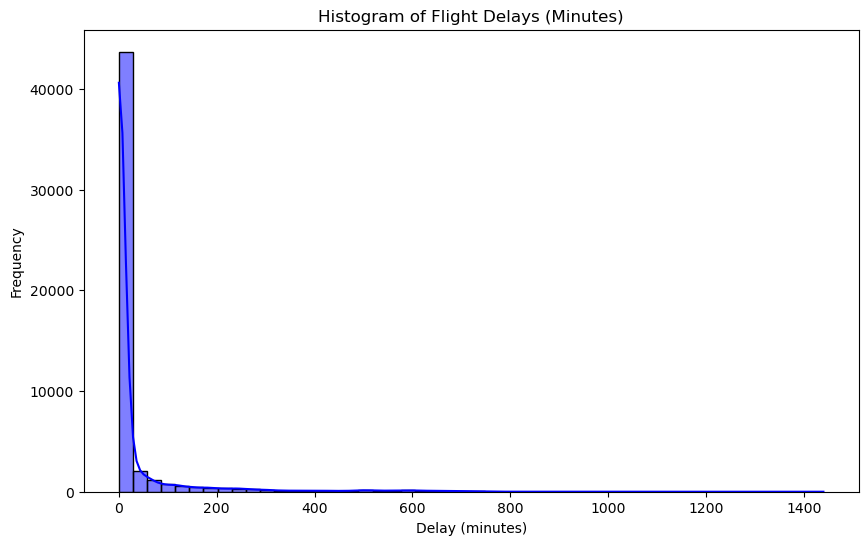

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=combined, x='Delay (minutes)', bins=50, kde=True, color='blue')
plt.title('Histogram of Flight Delays (Minutes)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


### Temporal Analysis
Delays Across Hours: Extract the hour from Scheduled Time and plot delays.

C:\Users\User\AppData\Local\Temp\ipykernel_8916\1629890337.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined, x='Scheduled Hour', y='Delay (minutes)', ci=None, palette='plasma')
C:\Users\User\AppData\Local\Temp\ipykernel_8916\1629890337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x='Scheduled Hour', y='Delay (minutes)', ci=None, palette='plasma')


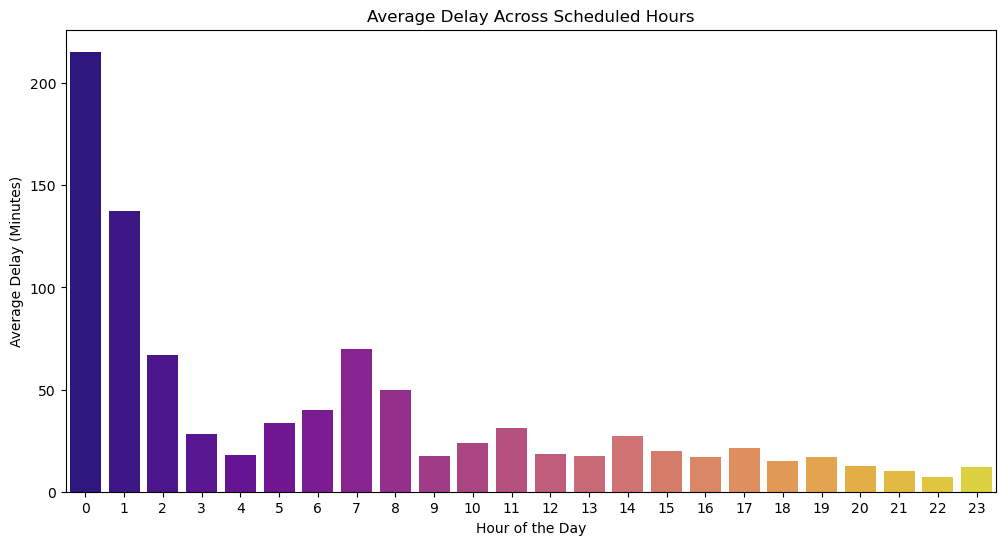

In [52]:
combined['Scheduled Hour'] = combined['Scheduled Time'].dt.hour

plt.figure(figsize=(12, 6))
sns.barplot(data=combined, x='Scheduled Hour', y='Delay (minutes)', ci=None, palette='plasma')
plt.title('Average Delay Across Scheduled Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (Minutes)')
plt.show()


<Axes: xlabel='Scheduled Day', ylabel='Delay (minutes)'>

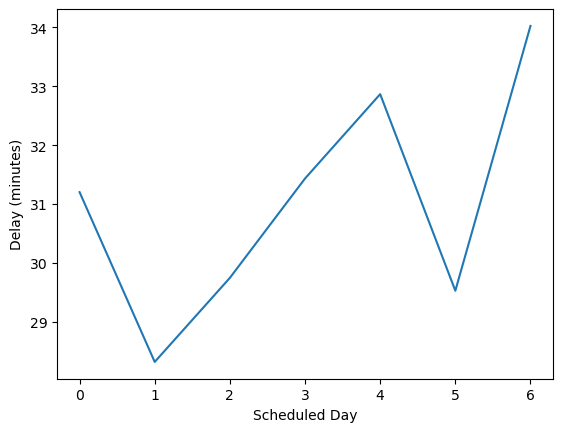

In [53]:
combined['Scheduled Day'] = combined['Scheduled Time'].dt.dayofweek
combined['Scheduled Month'] = combined['Scheduled Time'].dt.month

sns.lineplot(data=combined.groupby('Scheduled Day')['Delay (minutes)'].mean())


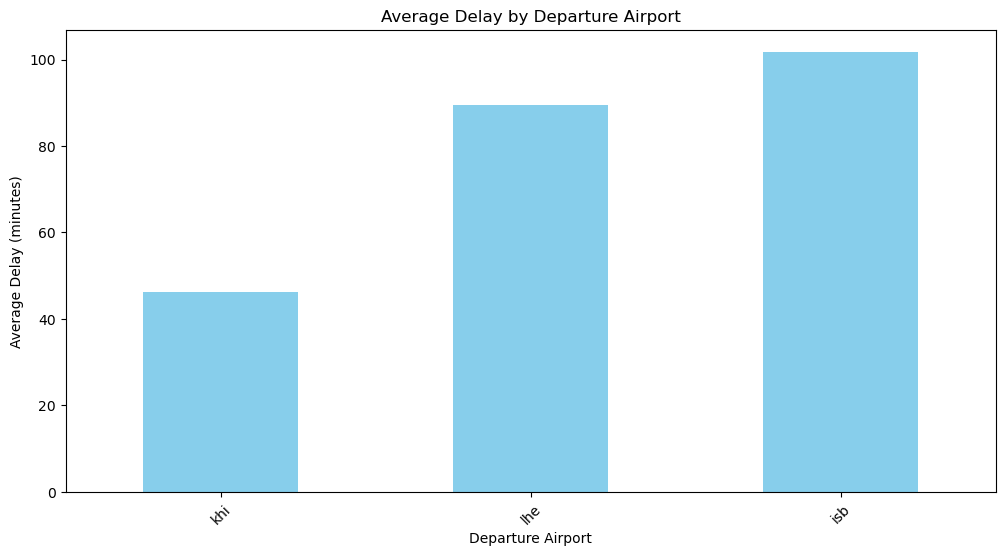

C:\Users\User\AppData\Local\Temp\ipykernel_8916\3154111773.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset, label=airport, shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8916\3154111773.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset, label=airport, shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8916\3154111773.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset, label=airport, shade=True)


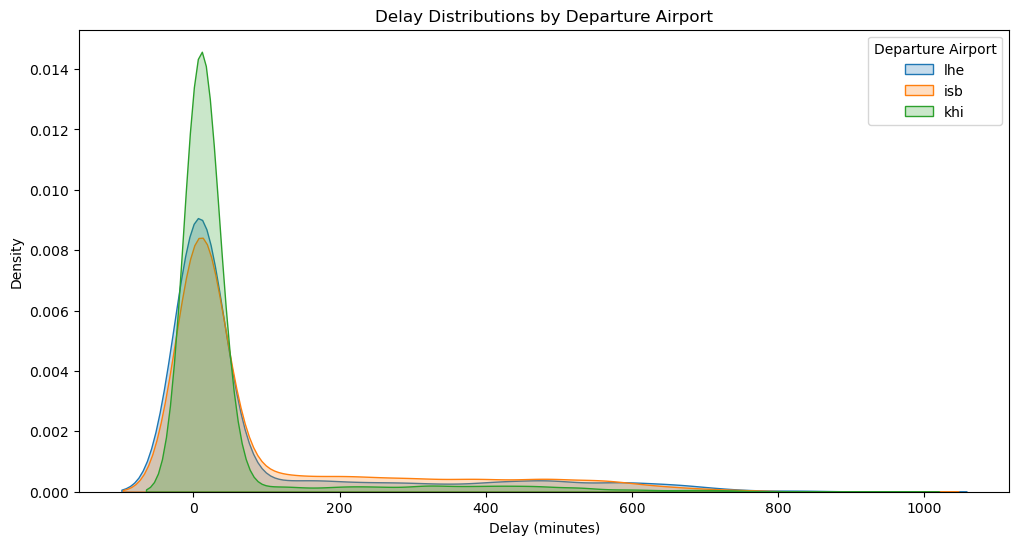

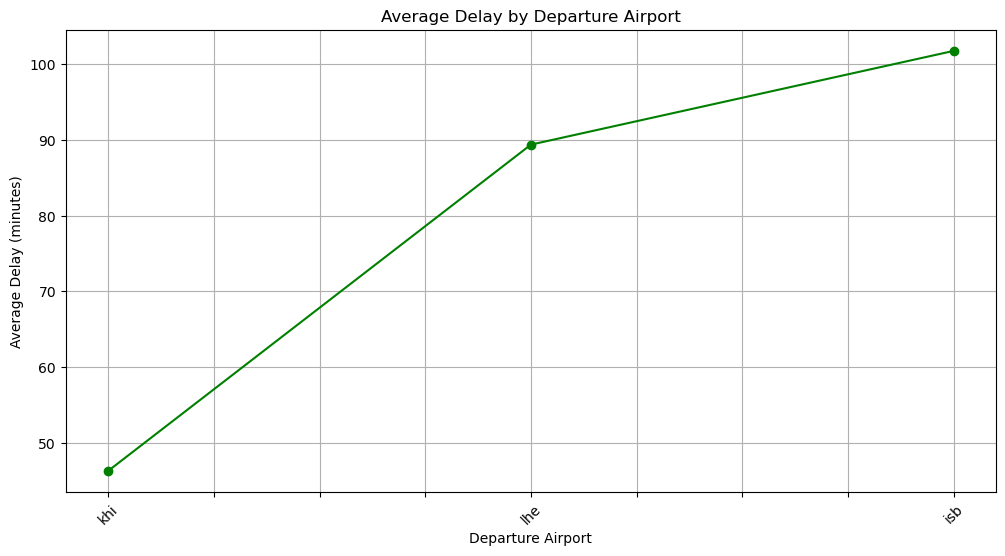

In [145]:
top_airports = combined['Departure IATA Code'].value_counts().head(10).index

# Calculate the average delay for each top airport
avg_delay_by_airport = combined[combined['Departure IATA Code'].isin(top_airports)].groupby('Departure IATA Code')['Delay (minutes)'].mean()

plt.figure(figsize=(12, 6))
avg_delay_by_airport.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Delay by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
for airport in top_airports:
    subset = combined[combined['Departure IATA Code'] == airport]['Delay (minutes)']
    sns.kdeplot(subset, label=airport, shade=True)

plt.title('Delay Distributions by Departure Airport')
plt.xlabel('Delay (minutes)')
plt.ylabel('Density')
plt.legend(title='Departure Airport')
plt.show()

plt.figure(figsize=(12, 6))
avg_delay_by_airport.sort_values().plot(kind='line', marker='o', color='green')
plt.title('Average Delay by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


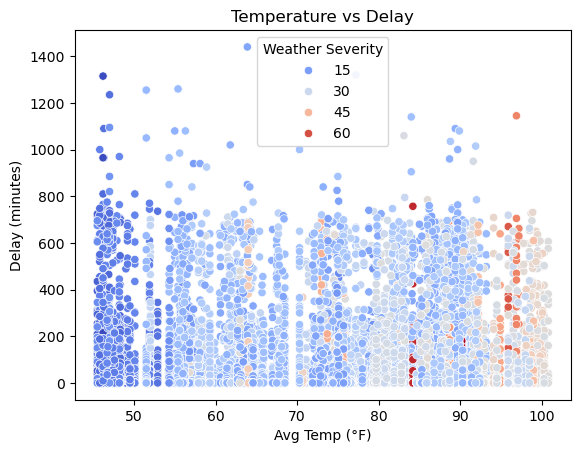

In [58]:
sns.scatterplot(data=combined, x='Avg Temp (°F)', y='Delay (minutes)', hue='Weather Severity', palette='coolwarm')
plt.title('Temperature vs Delay')
plt.show()


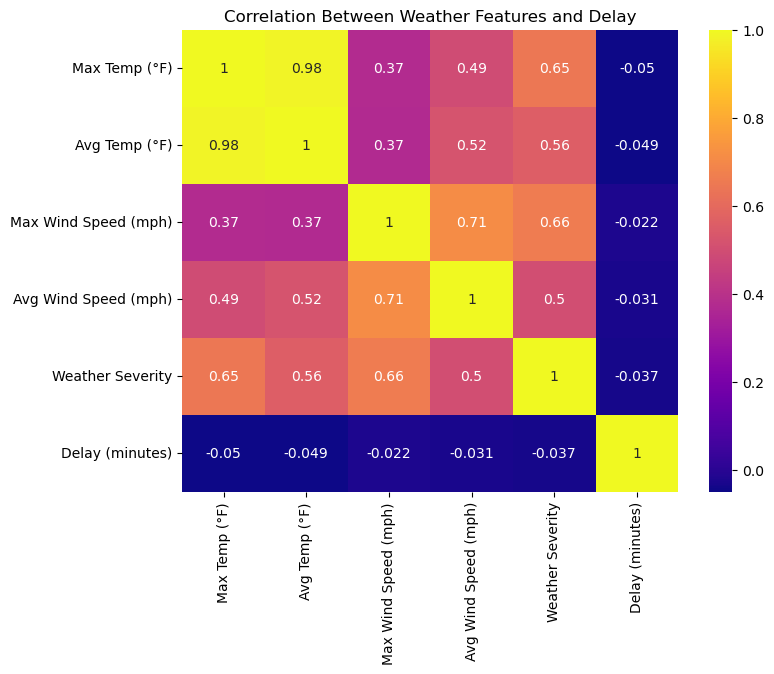

In [59]:
weather_cols = ['Max Temp (°F)', 'Avg Temp (°F)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)', 
                'Weather Severity', 'Delay (minutes)']
plt.figure(figsize=(8, 6))
sns.heatmap(combined[weather_cols].corr(), annot=True, cmap='plasma')
plt.title('Correlation Between Weather Features and Delay')
plt.show()


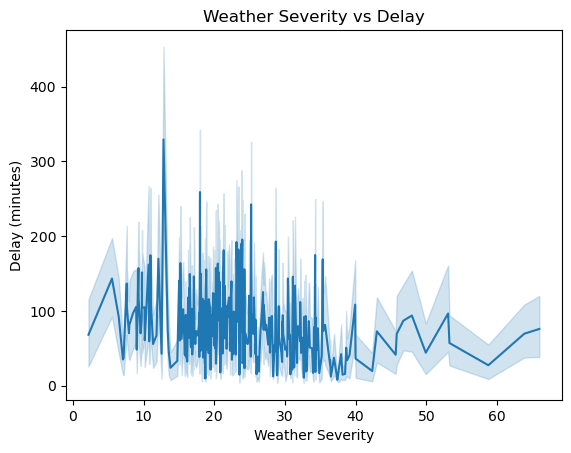

In [151]:
sns.lineplot(data=combined, x='Weather Severity', y='Delay (minutes)')
plt.title('Weather Severity vs Delay')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8916\4063996567.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train['Delay (minutes)'], label='Train', shade=True, color='blue')
C:\Users\User\AppData\Local\Temp\ipykernel_8916\4063996567.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=test['Delay (minutes)'], label='Test', shade=True, color='orange')


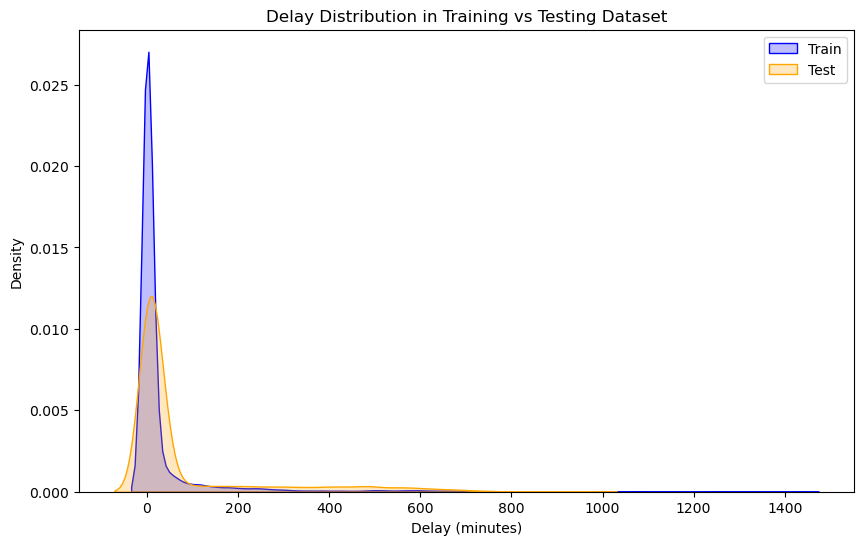

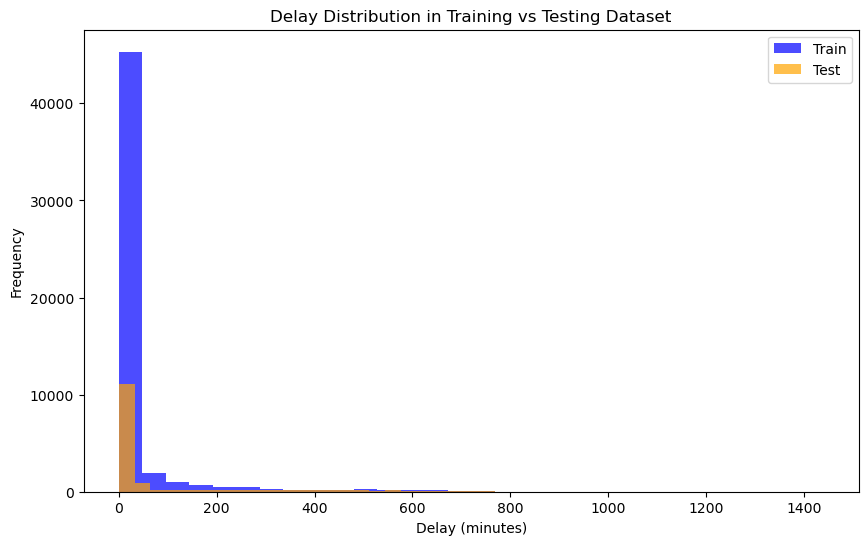

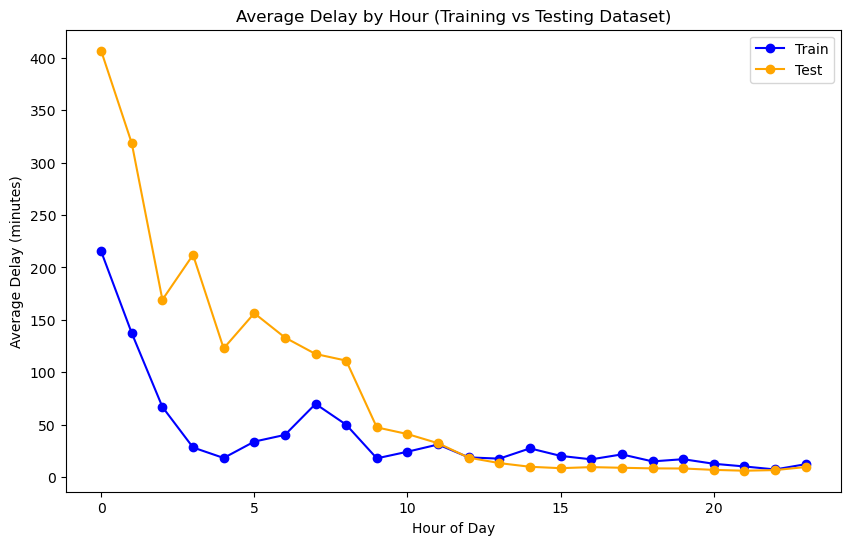

Training Dataset Delay Summary:
count    51572.000000
mean        31.033700
std        102.076574
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max       1440.000000
Name: Delay (minutes), dtype: float64

Testing Dataset Delay Summary:
count    14910.000000
mean        79.603018
std        163.439344
min          0.000000
25%          0.000000
50%         12.000000
75%         33.000000
max        960.000000
Name: Delay (minutes), dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_8916\4063996567.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Dataset', y='Delay (minutes)', palette='husl')


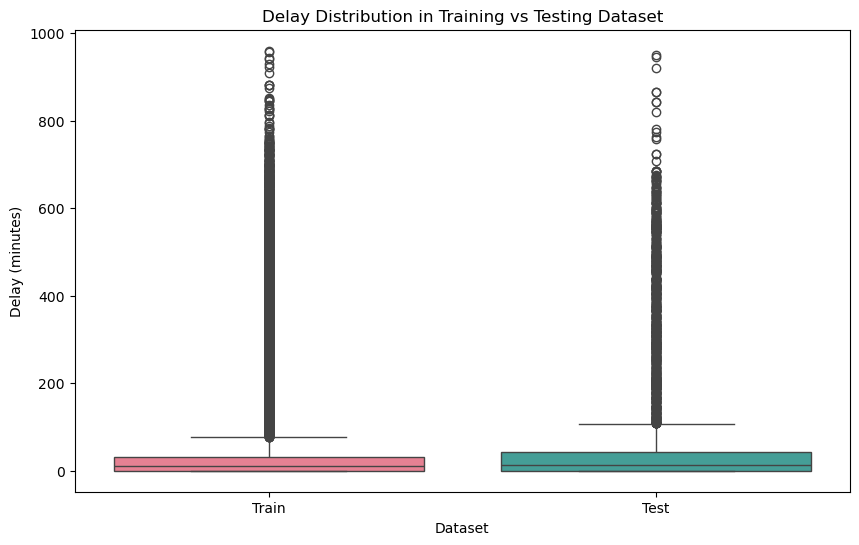

           count       mean         std  min  25%   50%   75%    max
Dataset                                                             
Test      2982.0  88.027498  165.945930  0.0  0.0  13.0  43.0  951.0
Train    11928.0  77.496898  162.745574  0.0  0.0  11.0  31.0  960.0


In [138]:
train['Dataset'] = 'Train'
test['Dataset'] = 'Test'

combined_df = pd.concat([train, test], axis=0)


combined['Dataset'] = ['Train' if i < int(0.8 * len(combined)) else 'Test' for i in range(len(combined))]
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train['Delay (minutes)'], label='Train', shade=True, color='blue')
sns.kdeplot(data=test['Delay (minutes)'], label='Test', shade=True, color='orange')
plt.title('Delay Distribution in Training vs Testing Dataset')
plt.xlabel('Delay (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(train['Delay (minutes)'], bins=30, alpha=0.7, label='Train', color='blue')
plt.hist(test['Delay (minutes)'], bins=30, alpha=0.7, label='Test', color='orange')
plt.title('Delay Distribution in Training vs Testing Dataset')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

train['Hour'] = train['Scheduled Time'].dt.hour
test['Hour'] = test['Scheduled Time'].dt.hour

avg_delay_train = train.groupby('Hour')['Delay (minutes)'].mean()
avg_delay_test = test.groupby('Hour')['Delay (minutes)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_delay_train.index, avg_delay_train.values, label='Train', marker='o', color='blue')
plt.plot(avg_delay_test.index, avg_delay_test.values, label='Test', marker='o', color='orange')
plt.title('Average Delay by Hour (Training vs Testing Dataset)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()

print("Training Dataset Delay Summary:")
print(train['Delay (minutes)'].describe())

print("\nTesting Dataset Delay Summary:")
print(test['Delay (minutes)'].describe())


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined, x='Dataset', y='Delay (minutes)', palette='husl')
plt.title('Delay Distribution in Training vs Testing Dataset')
plt.xlabel('Dataset')
plt.ylabel('Delay (minutes)')
plt.show()

print(combined.groupby('Dataset')['Delay (minutes)'].describe())


# Binary Classification

## Data Preparation

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define binary labels
train['Binary Class'] = train['Delay (minutes)'].apply(lambda x: 0 if x == 0 else 1)
test['Binary Class'] = test['Delay (minutes)'].apply(lambda x: 0 if x == 0 else 1)

# Separate features and labels
X_train = train.drop(['Delay (minutes)', 'Binary Class'], axis=1).select_dtypes(include=['float64', 'int64'])
y_train = train['Binary Class']
X_test = test.drop(['Delay (minutes)', 'Binary Class'], axis=1).select_dtypes(include=['float64', 'int64'])
y_test = test['Binary Class']

# Train model
binary_model = RandomForestClassifier(random_state=42)
binary_model.fit(X_train, y_train)

# Predictions
y_pred = binary_model.predict(X_test)


Binary Classification Report:
              precision    recall  f1-score   support

     On-Time       0.32      0.84      0.47      4373
     Delayed       0.80      0.26      0.39     10537

    accuracy                           0.43     14910
   macro avg       0.56      0.55      0.43     14910
weighted avg       0.66      0.43      0.42     14910



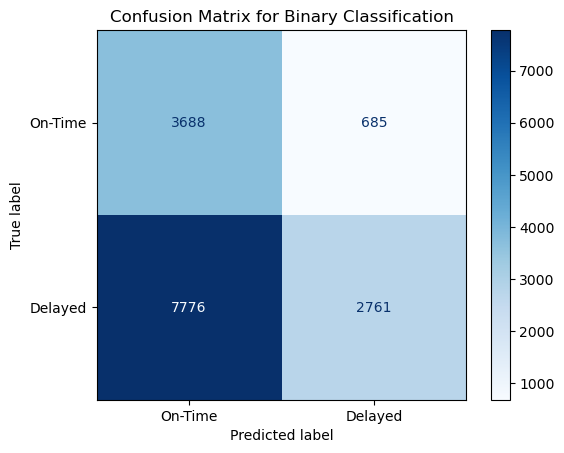

In [158]:
# Metrics
print("Binary Classification Report:")
print(classification_report(y_test, y_pred, target_names=['On-Time', 'Delayed']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['On-Time', 'Delayed'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Binary Classification')
plt.show()


In [165]:
# Define multi-class labels
def categorize_delay(delay):
    if delay == 0:
        return 0  # No Delay
    elif delay < 45:
        return 1  # Short Delay
    elif delay <= 175:
        return 2  # Moderate Delay
    else:
        return 3  # Long Delay

train['Multi-Class'] = train['Delay (minutes)'].apply(categorize_delay)
test['Multi-Class'] = test['Delay (minutes)'].apply(categorize_delay)

# Separate features and labels
X_train_multi = train.drop(['Delay (minutes)', 'Multi-Class'], axis=1).select_dtypes(include=['float64', 'int64'])
y_train_multi = train['Multi-Class']
X_test_multi = test.drop(['Delay (minutes)', 'Multi-Class'], axis=1).select_dtypes(include=['float64', 'int64'])
y_test_multi = test['Multi-Class']

# Train model
multi_model = RandomForestClassifier(random_state=42)
multi_model.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_multi = multi_model.predict(X_test_multi)


Multi-Class Classification Report:
                precision    recall  f1-score   support

      No Delay       1.00      1.00      1.00      4373
   Short Delay       0.79      0.58      0.67      7370
Moderate Delay       0.12      0.26      0.17       854
    Long Delay       0.37      0.54      0.44      2313

      accuracy                           0.68     14910
     macro avg       0.57      0.59      0.57     14910
  weighted avg       0.75      0.68      0.70     14910



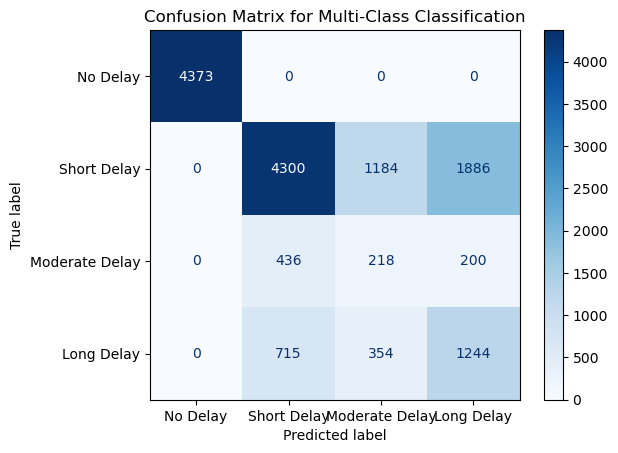

In [167]:
# Metrics
print("Multi-Class Classification Report:")
print(classification_report(y_test_multi, y_pred_multi, target_names=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay']))

# Confusion Matrix
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
disp_multi.plot(cmap='Blues')
plt.title('Confusion Matrix for Multi-Class Classification')
plt.show()


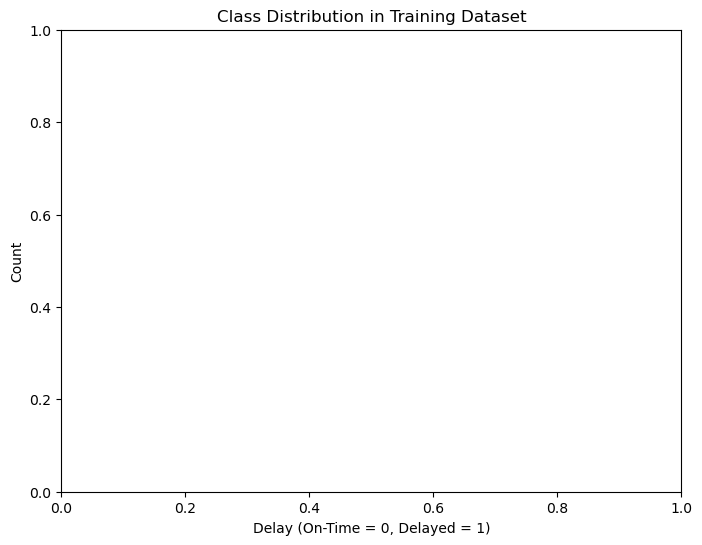

ValueError: Found array with 0 sample(s) (shape=(0, 40)) while a minimum of 1 is required by LogisticRegression.

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Handle datetime columns: convert to numerical if needed or drop
for col in train.select_dtypes(include=['datetime64']).columns:
    # Convert to number of seconds since epoch (or choose any other numeric transformation)
    train[col] = train[col].astype('int64') // 10**9
    test[col] = test[col].astype('int64') // 10**9

# Handle missing values (if any)
train = train.dropna()  # Drop rows with missing values (you can choose to impute instead)
test = test.dropna()

# Ensure you have train and test datasets
# Identify common features between train and test (non-null)
common_features = [col for col in train.columns if col in test.columns and train[col].notnull().all() and test[col].notnull().all()]

# Drop target column 'Delay (minutes)' from common features
common_features.remove('Delay (minutes)')

# Label encode categorical features in train and test datasets
label_encoders = {}
for col in train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

# Extract features and target
X_train, y_train = train[common_features], (train['Delay (minutes)'] > 0).astype(int)
X_test, y_test = test[common_features], (test['Delay (minutes)'] > 0).astype(int)

# Plot class distributions for training dataset
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Delay (On-Time = 0, Delayed = 1)")
plt.ylabel("Count")
plt.show()

# Evaluate different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Display model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="husl")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()
